## Genesis Set Permission Tree Data Collection
### Using https://github.com/0L-Analytics/permission-tree-monitoring API for Permission Tree of Validators on 0L
#### Credit to: https://github.com/0L-Analytics/permission-tree-monitoring/commits?author=agouin for building the API

### Shows relationship of Genesis Set to their first generation validators

In [2]:
import requests
import pandas as pd
import csv
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
import matplotlib.patches as mpatches

from utils import load_addresses_list, get_permission_tree, get_epoch

### Get Account addresses into a list

In [3]:
path = 'address.csv'
all_addresses = load_addresses_list(path)
all_addresses

['E57CF27B3381574151B4FCEA65BDA0D2',
 'E8A1BF5E60FA00C2B792098B12FDE964',
 'B5B5BA58B8E9916FE449D1F989383834',
 'EA10EA06C0FDAB689DA9DCF78FC90F4E',
 'BDB8AD37341CEC0817FD8E2474E25031',
 '44BFFCEB6AC69D098959E4F463FB7005',
 '252F0B551C80CD9E951D82C6F70792AE',
 'D0D62AE27A4E84B559DA089A1B15A79F',
 '34E5ADDEC49DED4CC638DAD8CD992858',
 '5ABEDEC612EA01B9F6F2EAAD7187BFEF',
 'E4E9FB27D7A8150162614EBDD282E195',
 'D1C9CE9308B0BDC6DC2BA6A7B5DA8C2B',
 'CCB020E30B1C014F45664761F0B740C7',
 'C0A1F4D49658CF2FE5402E10F496BB80',
 '7E56B29CB23A49368BE593E5CFC9712E',
 '46A7A744B5D33C47F6B20766F8088B10',
 '7EC16859C24200D8E074809D252AC740',
 '64B21681CE1C34854498ED92D76432A2',
 'ECAF65ADD1B785B0495E3099F4045EC0',
 '304A03C0B4ACDFDCE54BFAF39D4E0448',
 'B1471DC5764695ABB4CADF16E26BD4C7',
 'D67F3FF22BD719EB5BE2DF6577C9B42D',
 '8421CB22E56F687395F5973BBF0CBDFB']

### Get Permission Tree for the addresses

In [4]:
genesis_tree = get_permission_tree(all_addresses)

In [5]:
genesis_tree

{'E57CF27B3381574151B4FCEA65BDA0D2': {'address': 'e57cf27b3381574151b4fcea65bda0d2',
  'operator_address': '76484d6025e1310f3c89f4467e024a24',
  'parent': 'd0d62ae27a4e84b559da089a1b15a79f',
  'epoch_onboarded': 20,
  'version_onboarded': 5021771,
  'generation': 1,
  'children': []},
 'E8A1BF5E60FA00C2B792098B12FDE964': {'address': 'e8a1bf5e60fa00c2b792098b12fde964',
  'operator_address': '9f395754547c76fda1577edd53a959d9',
  'parent': 'c0a1f4d49658cf2fe5402e10f496bb80',
  'epoch_onboarded': 16,
  'version_onboarded': 3596612,
  'generation': 1,
  'children': [{'address': '59c6262930e3ebb3398d5b88790c090c',
    'operator_address': 'ca949aa34965a5984c2bffff69237216',
    'parent': 'e8a1bf5e60fa00c2b792098b12fde964',
    'epoch_onboarded': 38,
    'version_onboarded': 9628061,
    'generation': 2}]},
 'B5B5BA58B8E9916FE449D1F989383834': {'address': 'b5b5ba58b8e9916fe449d1f989383834',
  'operator_address': '8ab6489146a5ebc6890dd532bc249545',
  'parent': '8421cb22e56f687395f5973bbf0cbdfb'

In [6]:
with open('almost_genesis.json', 'w') as outfile:
    json.dump(genesis_tree, outfile)

## TODO:

- [ ] Create networkx object to show parent-child relationship at current epoch

- [ ] Create viz to show genesis parent-child relationship change at each epoch

- [ x ] Would only show genesis-child, need to then query API to 1st generation child to 2nd generation child relationship


In [7]:
len(genesis_tree)

23

In [8]:
# for keys, values in genesis_tree.items():
#     if values['children']:
#         print('yes')
        # genesis_only = [x for x in genesis_tree.values()['children'] != []]

## Filter superset of addresses for genesis set only
### Puts into a list and loses the extra address key

In [9]:
genesis_only = [values for values in genesis_tree.values() if values['parent']=='00000000000000000000000000000000']

In [41]:
print(len(genesis_only))
genesis_only

19


[{'address': 'bdb8ad37341cec0817fd8e2474e25031',
  'operator_address': '148c808f4063d03966c10f61dd6f3711',
  'parent': '00000000000000000000000000000000',
  'epoch_onboarded': 0,
  'version_onboarded': 0,
  'generation': 0,
  'children': [{'address': 'e985cbb111a6e7210f1f07aa1f8a75dd',
    'operator_address': 'ee58c4a2938cf3d892e85fb2cc039245',
    'parent': 'bdb8ad37341cec0817fd8e2474e25031',
    'epoch_onboarded': 23,
    'version_onboarded': 5850341,
    'generation': 1}]},
 {'address': '44bffceb6ac69d098959e4f463fb7005',
  'operator_address': 'd888258f1516b4f82680d36e9a1f16e8',
  'parent': '00000000000000000000000000000000',
  'epoch_onboarded': 0,
  'version_onboarded': 0,
  'generation': 0,
  'children': [{'address': 'a6be3ad55806f2f65cd1776322aede1a',
    'operator_address': '1d281e527124c0ebb466a553a3d5063e',
    'parent': '44bffceb6ac69d098959e4f463fb7005',
    'epoch_onboarded': 21,
    'version_onboarded': 5218882,
    'generation': 1},
   {'address': '9401af0f29d2afd49b8e48

In [11]:
with open('genesis_only.json', 'w') as outfile:
    json.dump(genesis_only, outfile)

In [12]:
len(genesis_only)

19

### Puts into a list and but preserves the extra address key

In [13]:
genesis_only_key = [[keys, values] for [keys,values] in genesis_tree.items() if values['parent']=='00000000000000000000000000000000']

In [42]:
print(len(genesis_only_key))
genesis_only_key

19


[['BDB8AD37341CEC0817FD8E2474E25031',
  {'address': 'bdb8ad37341cec0817fd8e2474e25031',
   'operator_address': '148c808f4063d03966c10f61dd6f3711',
   'parent': '00000000000000000000000000000000',
   'epoch_onboarded': 0,
   'version_onboarded': 0,
   'generation': 0,
   'children': [{'address': 'e985cbb111a6e7210f1f07aa1f8a75dd',
     'operator_address': 'ee58c4a2938cf3d892e85fb2cc039245',
     'parent': 'bdb8ad37341cec0817fd8e2474e25031',
     'epoch_onboarded': 23,
     'version_onboarded': 5850341,
     'generation': 1}]}],
 ['44BFFCEB6AC69D098959E4F463FB7005',
  {'address': '44bffceb6ac69d098959e4f463fb7005',
   'operator_address': 'd888258f1516b4f82680d36e9a1f16e8',
   'parent': '00000000000000000000000000000000',
   'epoch_onboarded': 0,
   'version_onboarded': 0,
   'generation': 0,
   'children': [{'address': 'a6be3ad55806f2f65cd1776322aede1a',
     'operator_address': '1d281e527124c0ebb466a553a3d5063e',
     'parent': '44bffceb6ac69d098959e4f463fb7005',
     'epoch_onboarded':

In [15]:
genesis_only_key[0]

['BDB8AD37341CEC0817FD8E2474E25031',
 {'address': 'bdb8ad37341cec0817fd8e2474e25031',
  'operator_address': '148c808f4063d03966c10f61dd6f3711',
  'parent': '00000000000000000000000000000000',
  'epoch_onboarded': 0,
  'version_onboarded': 0,
  'generation': 0,
  'children': [{'address': 'e985cbb111a6e7210f1f07aa1f8a75dd',
    'operator_address': 'ee58c4a2938cf3d892e85fb2cc039245',
    'parent': 'bdb8ad37341cec0817fd8e2474e25031',
    'epoch_onboarded': 23,
    'version_onboarded': 5850341,
    'generation': 1}]}]

In [16]:
G = nx.DiGraph()
for node in genesis_only:
    for keys, values in node.items():       
        G.add_node(node['address'], children = node['children'], epoch_onboarded = 0, generation = 0) # epoch_onboarded = values['epoch_onboarded']) not true for genesis
        # print(G)
    
# from_dict_of_dicts(genesis_tree)

In [17]:
print(G.nodes['7e56b29cb23a49368be593e5cfc9712e'])

{'children': [{'address': '0ef85e1723530edd76f2bb13614ac5c5', 'operator_address': 'c6c3414f37d81f68f8447ddfeaf588ac', 'parent': '7e56b29cb23a49368be593e5cfc9712e', 'epoch_onboarded': 37, 'version_onboarded': 9271787, 'generation': 1}], 'epoch_onboarded': 0, 'generation': 0}


In [18]:
G.nodes['7e56b29cb23a49368be593e5cfc9712e']['children']

[{'address': '0ef85e1723530edd76f2bb13614ac5c5',
  'operator_address': 'c6c3414f37d81f68f8447ddfeaf588ac',
  'parent': '7e56b29cb23a49368be593e5cfc9712e',
  'epoch_onboarded': 37,
  'version_onboarded': 9271787,
  'generation': 1}]

In [19]:
G.nodes['ccb020e30b1c014f45664761f0b740c7']['children']

[{'address': 'ea10ea06c0fdab689da9dcf78fc90f4e',
  'operator_address': 'dc75c1d21c5cab6a8f8978678a4af699',
  'parent': 'ccb020e30b1c014f45664761f0b740c7',
  'epoch_onboarded': 16,
  'version_onboarded': 3637438,
  'generation': 1},
 {'address': '9d0a8f2f51a2cb0d4eceeb1fd269431d',
  'operator_address': '17bbd0e9ba88b569ca5e3bd3c6f04952',
  'parent': 'ccb020e30b1c014f45664761f0b740c7',
  'epoch_onboarded': 31,
  'version_onboarded': 7958699,
  'generation': 1}]

In [20]:
C = nx.DiGraph()
print('Genesis Child Count')
for node in G:
    C.add_node(node, data=True)
    # print(node)
    if 'children' in G.nodes[node]:
        print(node, '  ',len(G.nodes[node]['children']))
        for child in G.nodes[node]['children']:
            C.add_node(child['address'])
            C.add_node(child['address'], epoch_onboarded= child['epoch_onboarded'], generation = 1)
            C.add_edge(node,child['address'])
            # print(child)
    else:
        print('0')

Genesis Child Count
bdb8ad37341cec0817fd8e2474e25031    1
44bffceb6ac69d098959e4f463fb7005    2
252f0b551c80cd9e951d82c6f70792ae    3
d0d62ae27a4e84b559da089a1b15a79f    2
34e5addec49ded4cc638dad8cd992858    3
5abedec612ea01b9f6f2eaad7187bfef    2
e4e9fb27d7a8150162614ebdd282e195    1
d1c9ce9308b0bdc6dc2ba6a7b5da8c2b    1
ccb020e30b1c014f45664761f0b740c7    2
c0a1f4d49658cf2fe5402e10f496bb80    9
7e56b29cb23a49368be593e5cfc9712e    1
46a7a744b5d33c47f6b20766f8088b10    3
7ec16859c24200d8e074809d252ac740    3
64b21681ce1c34854498ed92d76432a2    2
ecaf65add1b785b0495e3099f4045ec0    2
304a03c0b4acdfdce54bfaf39d4e0448    2
b1471dc5764695abb4cadf16e26bd4c7    1
d67f3ff22bd719eb5be2df6577c9b42d    2
8421cb22e56f687395f5973bbf0cbdfb    2


In [21]:
C = nx.DiGraph()
print('Genesis Child Count')

gen1_list = []
for node,d in G.nodes(data=True):
    C.add_node(node, data=True)
    # print(node)
    if 'children' in G.nodes[node]:
        print(node, '  ',len(G.nodes[node]['children']))
        for child in G.nodes[node]['children']:
            # C.add_node(child['address'])
            C.add_node(child['address'], epoch_onboarded= child['epoch_onboarded'], generation = 1)
            C.add_edge(node,child['address'])

            gen1_list.append(child['address'])
            # print(child)
    else:
        print('0')

Genesis Child Count
bdb8ad37341cec0817fd8e2474e25031    1
44bffceb6ac69d098959e4f463fb7005    2
252f0b551c80cd9e951d82c6f70792ae    3
d0d62ae27a4e84b559da089a1b15a79f    2
34e5addec49ded4cc638dad8cd992858    3
5abedec612ea01b9f6f2eaad7187bfef    2
e4e9fb27d7a8150162614ebdd282e195    1
d1c9ce9308b0bdc6dc2ba6a7b5da8c2b    1
ccb020e30b1c014f45664761f0b740c7    2
c0a1f4d49658cf2fe5402e10f496bb80    9
7e56b29cb23a49368be593e5cfc9712e    1
46a7a744b5d33c47f6b20766f8088b10    3
7ec16859c24200d8e074809d252ac740    3
64b21681ce1c34854498ed92d76432a2    2
ecaf65add1b785b0495e3099f4045ec0    2
304a03c0b4acdfdce54bfaf39d4e0448    2
b1471dc5764695abb4cadf16e26bd4c7    1
d67f3ff22bd719eb5be2df6577c9b42d    2
8421cb22e56f687395f5973bbf0cbdfb    2


In [22]:
gen_1_tree = get_permission_tree(gen1_list)

In [23]:
gen_1_tree

{'e985cbb111a6e7210f1f07aa1f8a75dd': {'address': 'e985cbb111a6e7210f1f07aa1f8a75dd',
  'operator_address': 'ee58c4a2938cf3d892e85fb2cc039245',
  'parent': 'bdb8ad37341cec0817fd8e2474e25031',
  'epoch_onboarded': 23,
  'version_onboarded': 5850341,
  'generation': 1,
  'children': []},
 'a6be3ad55806f2f65cd1776322aede1a': {'address': 'a6be3ad55806f2f65cd1776322aede1a',
  'operator_address': '1d281e527124c0ebb466a553a3d5063e',
  'parent': '44bffceb6ac69d098959e4f463fb7005',
  'epoch_onboarded': 21,
  'version_onboarded': 5218882,
  'generation': 1,
  'children': [{'address': '97a31d6d14fc8024a34b1630e9c4f638',
    'operator_address': 'f120fb81dde9db4a1f81e0d01d2936e2',
    'parent': 'a6be3ad55806f2f65cd1776322aede1a',
    'epoch_onboarded': 36,
    'version_onboarded': 9042418,
    'generation': 2}]},
 '9401af0f29d2afd49b8e48a0c361f661': {'address': '9401af0f29d2afd49b8e48a0c361f661',
  'operator_address': 'fbfbaebb74e2d4c54d73c66dc329d909',
  'parent': '44bffceb6ac69d098959e4f463fb7005'

In [24]:
C_2 = nx.DiGraph()
gen2_list = []

for n, d in C.nodes(data=True):
    C_2.add_node(n, data=True)
    for keys, values in gen_1_tree.items():   
        if n == keys and values['children']:    
            print(values['children'])

            C_2.add_node(n,data=True)
            for child in values['children']: 
                C_2.add_node(child['address'], epoch_onboarded= child['epoch_onboarded'], generation = 2)
                C_2.add_edge(n,child['address'])
                gen2_list.append(child['address'])

                

[{'address': '97a31d6d14fc8024a34b1630e9c4f638', 'operator_address': 'f120fb81dde9db4a1f81e0d01d2936e2', 'parent': 'a6be3ad55806f2f65cd1776322aede1a', 'epoch_onboarded': 36, 'version_onboarded': 9042418, 'generation': 2}]
[{'address': '70a016df0643121bfc80ef1c87e4c189', 'operator_address': 'fcf3f5197c2231b9c2f4b139b94866a0', 'parent': '987d7486a6db70993eeab79124bc6606', 'epoch_onboarded': 51, 'version_onboarded': 12215818, 'generation': 2}]
[{'address': '7e0189dbb87456362542de9600811d91', 'operator_address': '79b34259a00a4f3a742fad7c58fd74ad', 'parent': '0761bca303f0baac640765d3ddf172be', 'epoch_onboarded': 128, 'version_onboarded': 29238111, 'generation': 2}, {'address': 'e0676852d0be4db002299d8af2796096', 'operator_address': '000dd36a4aeccb6a84f7b5f7a219a193', 'parent': '0761bca303f0baac640765d3ddf172be', 'epoch_onboarded': 143, 'version_onboarded': 32334427, 'generation': 2}]
[{'address': 'a2fab2df081cd8feed7f4d6ad2fff459', 'operator_address': 'f19aef1426da6f228173549901a79250', 'pa

In [25]:
gen_2_tree = get_permission_tree(gen2_list)

In [26]:
print(gen_2_tree)

{'97a31d6d14fc8024a34b1630e9c4f638': {'address': '97a31d6d14fc8024a34b1630e9c4f638', 'operator_address': 'f120fb81dde9db4a1f81e0d01d2936e2', 'parent': 'a6be3ad55806f2f65cd1776322aede1a', 'epoch_onboarded': 36, 'version_onboarded': 9042418, 'generation': 2, 'children': []}, '70a016df0643121bfc80ef1c87e4c189': {'address': '70a016df0643121bfc80ef1c87e4c189', 'operator_address': 'fcf3f5197c2231b9c2f4b139b94866a0', 'parent': '987d7486a6db70993eeab79124bc6606', 'epoch_onboarded': 51, 'version_onboarded': 12215818, 'generation': 2, 'children': []}, '7e0189dbb87456362542de9600811d91': {'address': '7e0189dbb87456362542de9600811d91', 'operator_address': '79b34259a00a4f3a742fad7c58fd74ad', 'parent': '0761bca303f0baac640765d3ddf172be', 'epoch_onboarded': 128, 'version_onboarded': 29238111, 'generation': 2, 'children': [{'address': 'b6ae71e87172e1d84b64163545e6833f', 'operator_address': 'c5ed4d4e5556ea8bf63d49785f7428ed', 'parent': '7e0189dbb87456362542de9600811d91', 'epoch_onboarded': 164, 'versio

In [27]:
H = nx.compose(G,C)
H_2 = nx.compose(H,C_2)

In [28]:
C_3 = nx.DiGraph()
gen3_list = []

for n, d in C_2.nodes(data=True):
    C_3.add_node(n, data=True)
    for keys, values in gen_2_tree.items():   
        if n == keys and values['children']:    
            print(values['children'])

            C_3.add_node(n,data=True)
            for child in values['children']: 
                C_3.add_node(child['address'], epoch_onboarded= child['epoch_onboarded'], generation = 3)
                C_3.add_edge(n,child['address'])
                gen3_list.append(child['address'])

                

[{'address': 'b6ae71e87172e1d84b64163545e6833f', 'operator_address': 'c5ed4d4e5556ea8bf63d49785f7428ed', 'parent': '7e0189dbb87456362542de9600811d91', 'epoch_onboarded': 164, 'version_onboarded': 36966707, 'generation': 3}]
[{'address': '56641e58aba97fa6b7ea833f83444392', 'operator_address': 'cfcae8403fa7bed93de913b77c92e559', 'parent': 'e77ddb76c9afcb3d5511e46cbc89023d', 'epoch_onboarded': 65, 'version_onboarded': 14906760, 'generation': 3}]
[{'address': '79d2a77b01e5cde1a5fb123119424acb', 'operator_address': 'f44fcba74c508563a9c51c0b40172a72', 'parent': '63bb637e57bf088b129bcf1bfd93ebf4', 'epoch_onboarded': 159, 'version_onboarded': 35988265, 'generation': 3}]
[{'address': '1e0f82ed044ad1b1e927f58da129a630', 'operator_address': '6e54927fa99afd069295d5b54fa2b019', 'parent': '3e169c31b0ddfed4f464e1756a90dfb5', 'epoch_onboarded': 303, 'version_onboarded': 65568386, 'generation': 3}, {'address': '71e5be86b41516743ac8594bc90ee2fc', 'operator_address': '373e2b5bcfecb6d55225043efdd504aa', '

In [29]:
H_3 = nx.compose(H_2,C_3)

In [30]:
gen_3_tree = get_permission_tree(gen3_list)

In [31]:
C_4 = nx.DiGraph()
gen_4_list = []

for n, d in C_3.nodes(data=True):
    C_4.add_node(n, data=True)
    for keys, values in gen_3_tree.items():   
        if n == keys and values['children']:    
            print(values['children'])

            C_4.add_node(n,data=True)
            for child in values['children']: 
                C_4.add_node(child['address'], epoch_onboarded= child['epoch_onboarded'], generation = 4)
                C_4.add_edge(n,child['address'])
                gen_4_list.append(child['address'])


[{'address': '6da2b828f3018637379203940c639a95', 'operator_address': 'ef1c50b6d526d89fa4ce077aebdd118a', 'parent': '1e0f82ed044ad1b1e927f58da129a630', 'epoch_onboarded': 328, 'version_onboarded': 70314447, 'generation': 4}, {'address': 'e202aa9b2cfdb96627531af17832f2ca', 'operator_address': '36d5101c160bb8921b747e6a7943dfe7', 'parent': '1e0f82ed044ad1b1e927f58da129a630', 'epoch_onboarded': 410, 'version_onboarded': 87258126, 'generation': 4}]
[{'address': 'a35ae41a5f1701fcb67f4e4cad59d259', 'operator_address': '2a9779597d797efbee6d21ba1216c6c6', 'parent': '79784b5981cc5407ba3bf9f7526f3f54', 'epoch_onboarded': 419, 'version_onboarded': 89192074, 'generation': 4}]
[{'address': 'ed27fceea43e882d39f7e89422b3a3f1', 'operator_address': '5515dfb0ed71b3d6ed129de884366b17', 'parent': '4c95e7b998b4e66ef666fe12930a4d5c', 'epoch_onboarded': 87, 'version_onboarded': 20465634, 'generation': 4}, {'address': '9909f6edb2a0684adecd7b448b989e4f', 'operator_address': 'da0bbf6f48010c4080fa04222e5ba155', 'p

In [32]:
H_4 = nx.compose(H_3,C_4)

In [33]:
gen_4_tree = get_permission_tree(gen_4_list)
C_5 = nx.DiGraph()
gen_5_list = []

for n, d in C_4.nodes(data=True):
    C_5.add_node(n, data=True)
    for keys, values in gen_4_tree.items():   
        if n == keys and values['children']:    
            print(values['children'])

            C_5.add_node(n,data=True)
            for child in values['children']: 
                C_5.add_node(child['address'], epoch_onboarded= child['epoch_onboarded'], generation = 5)
                C_5.add_edge(n,child['address'])
                gen_5_list.append(child['address'])
H_5 = nx.compose(H_4,C_5)

[{'address': '988b8c3b7e55b6e5126884e02c8f166e', 'operator_address': 'f989a9c6835eb8272df7c5ac40e1a144', 'parent': '6da2b828f3018637379203940c639a95', 'epoch_onboarded': 380, 'version_onboarded': 80870321, 'generation': 5}, {'address': '2bfd96d8a674a360b733d16c65728d72', 'operator_address': '0a3f841a240d4a76fd9c7d532c5f635c', 'parent': '6da2b828f3018637379203940c639a95', 'epoch_onboarded': 411, 'version_onboarded': 87512135, 'generation': 5}, {'address': 'c5162c65fde8c9d9ca9b564e41a54003', 'operator_address': '1d2504351412d24036ef14a9b234cb67', 'parent': '6da2b828f3018637379203940c639a95', 'epoch_onboarded': 425, 'version_onboarded': 90454168, 'generation': 5}]
[{'address': 'bb4dfa1a57eb330687b283da402d1a67', 'operator_address': 'dcea06ecc0b6d7852bc4f9d3a1c69b8d', 'parent': 'ed27fceea43e882d39f7e89422b3a3f1', 'epoch_onboarded': 102, 'version_onboarded': 23751577, 'generation': 5}, {'address': '6310ce55a22b2e7d39c5da4589442ab0', 'operator_address': 'ed82917453398774e38bf67973edba80', 'p

In [34]:
# if you want epoch_boarded list

# epoch_onboarded=nx.get_node_attributes(H_5,'epoch_onboarded')
# print(epoch_onboarded)

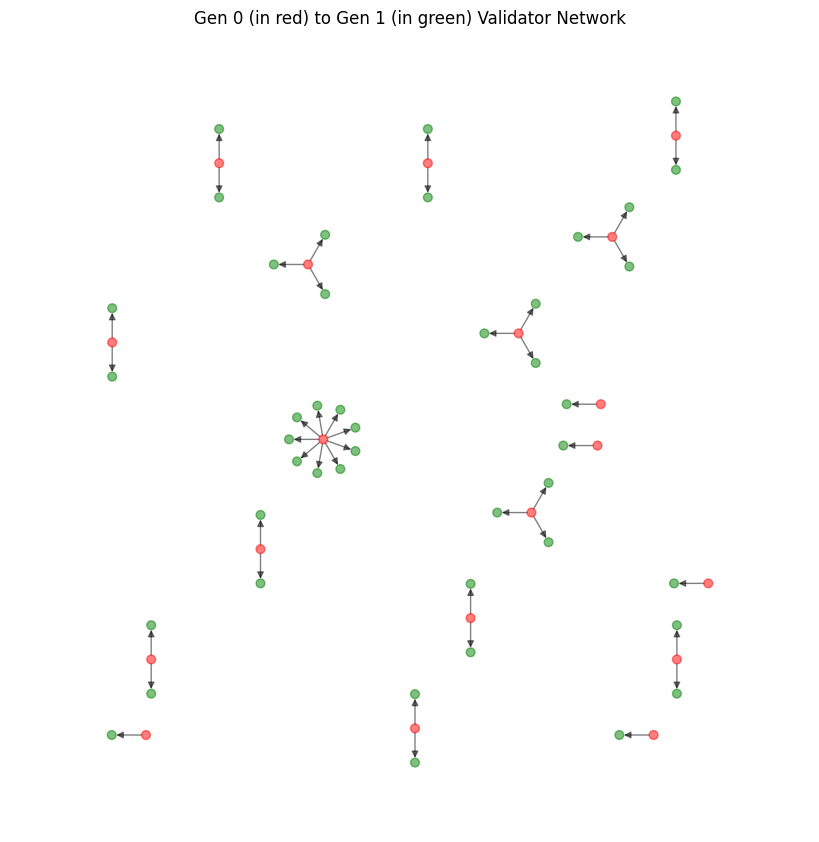

In [35]:
color_map = ['red' if H.nodes[node]['epoch_onboarded'] == 0 else 'green' for node in H]    
pos = nx.nx_agraph.graphviz_layout(H, prog="twopi", args="")
plt.figure(figsize=(8, 8))
nx.draw(H, pos, node_size=40, alpha=0.5, node_color=color_map, with_labels=False)
plt.axis("equal")
plt.title('Gen 0 (in red) to Gen 1 (in green) Validator Network')
plt.show()

In [1]:
epoch_list = get_epoch()
current_epoch = epoch_list[0]['epoch']
print(current_epoch)

NameError: name 'get_epoch' is not defined

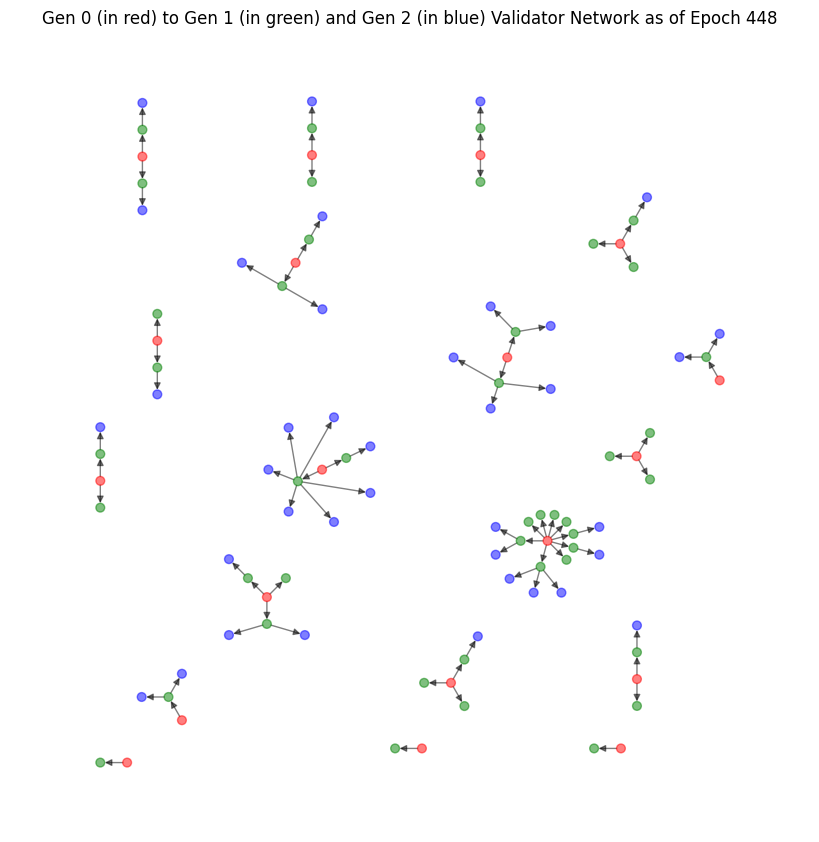

In [37]:
color_map = ['red' if H_2.nodes[node]['epoch_onboarded'] == 0 else 'green' if H_2.nodes[node]['generation'] ==1 else 'blue' for node in H_2]    
# color_map = ['red' if H_2.nodes[node]['epoch_onboarded'] == 0 else 'blue' for node in H_2]    

pos = nx.nx_agraph.graphviz_layout(H_2, prog="twopi", args="")
plt.figure(figsize=(8, 8))
nx.draw(H_2, pos, node_size=40, alpha=0.5, node_color=color_map, with_labels=False)
plt.axis("equal")
plt.title('Gen 0 (in red) to Gen 1 (in green) and Gen 2 (in blue) Validator Network as of Epoch ' + str(current_epoch))
plt.savefig("validatorset_" + str(current_epoch) + ".png", bbox_inches='tight')
plt.show()

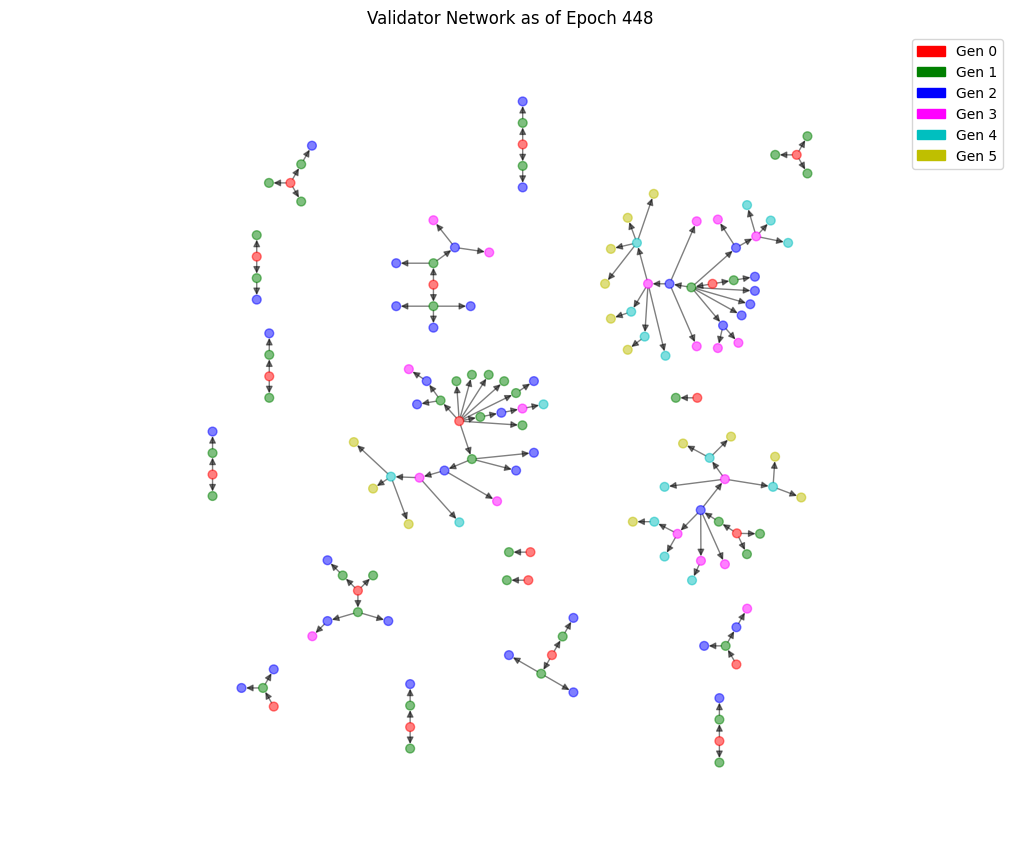

In [38]:
color_map = ['red' if H_5.nodes[node]['epoch_onboarded'] == 0 else 'green' if H_5.nodes[node]['generation'] ==1 else 'blue' if H_5.nodes[node]['generation'] ==2 \
    else 'magenta' if H_5.nodes[node]['generation'] ==3 else 'c' if H_5.nodes[node]['generation'] ==4 else 'y' for node in H_5]    
red_patch = mpatches.Patch(color='red', label='Gen 0')
green_patch = mpatches.Patch(color='green', label='Gen 1')
blue_patch = mpatches.Patch(color='blue', label='Gen 2')
magenta_patch = mpatches.Patch(color='magenta', label='Gen 3')
cyan_patch = mpatches.Patch(color='c', label='Gen 4')
y_patch = mpatches.Patch(color='y', label='Gen 5')
pos = nx.nx_agraph.graphviz_layout(H_5, prog="twopi", args="")
plt.figure(figsize=(10, 8))
nx.draw(H_5, pos, node_size=40, alpha=0.5, node_color=color_map, with_labels=False)
plt.axis("equal")
plt.title('Validator Network as of Epoch ' + str(current_epoch))
plt.legend(handles=[red_patch, green_patch, blue_patch, magenta_patch, cyan_patch, y_patch])
plt.savefig("validatorset_" + str(current_epoch) + ".png", bbox_inches='tight')
plt.show()

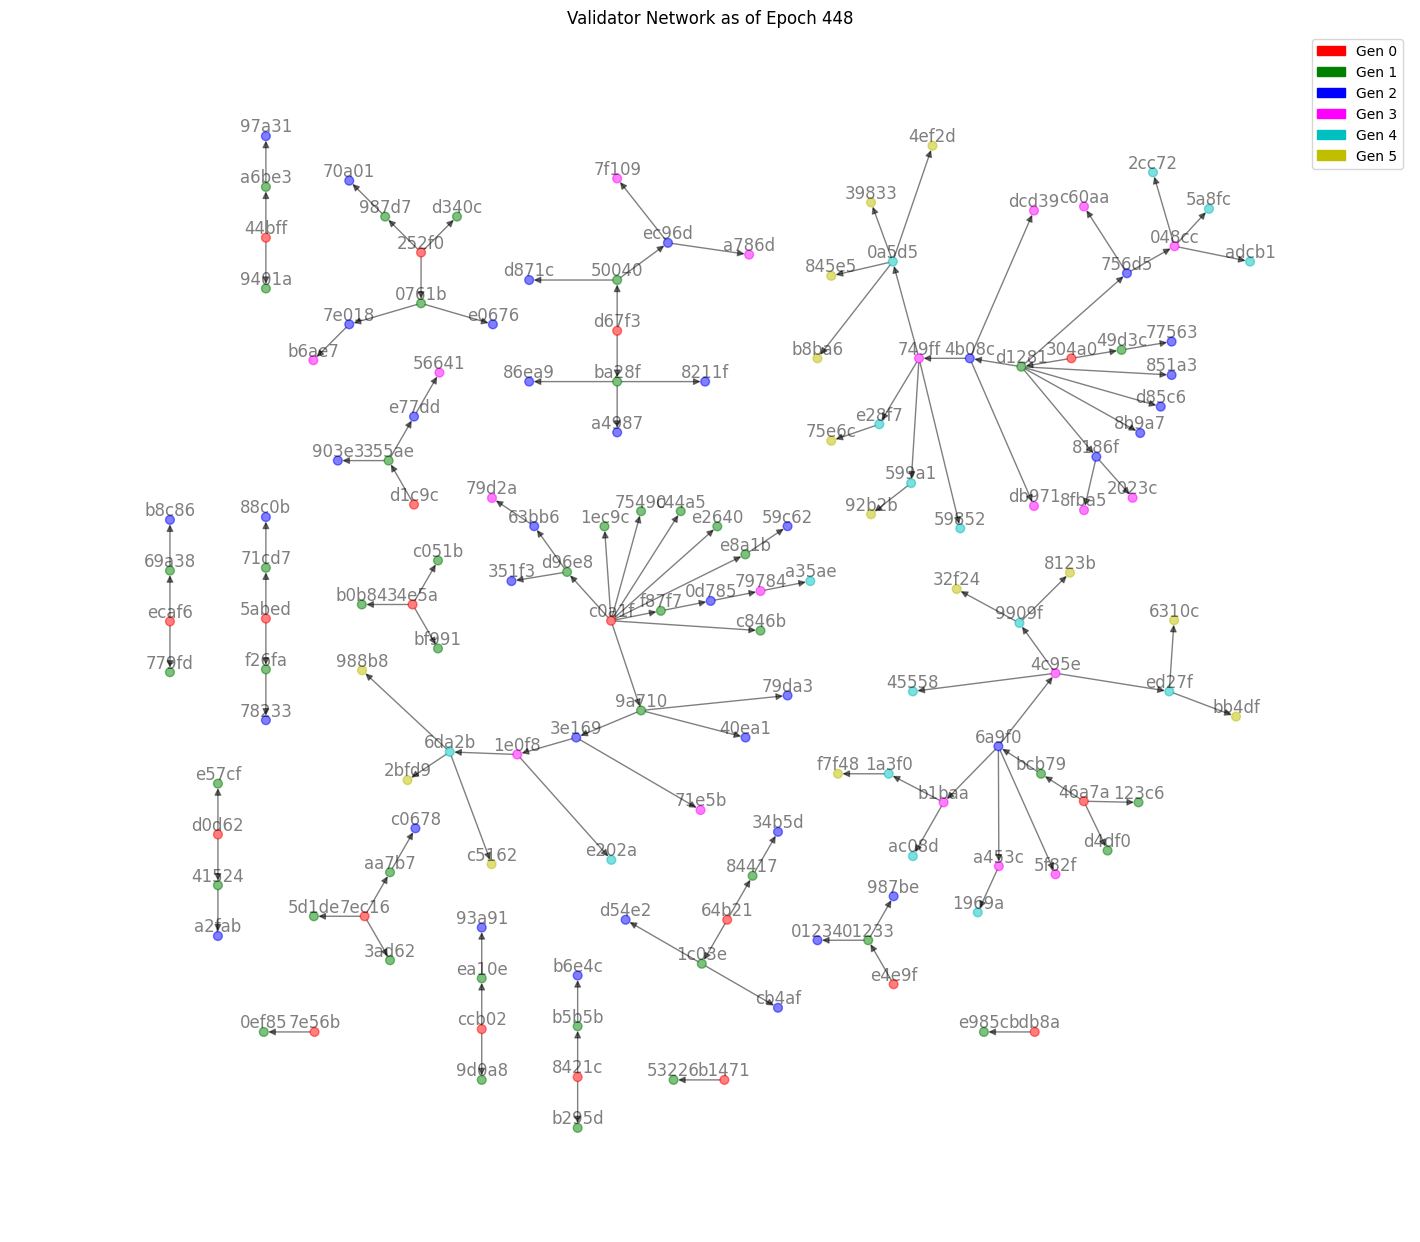

In [39]:
color_map = ['red' if H_5.nodes[node]['epoch_onboarded'] == 0 else 'green' if H_5.nodes[node]['generation'] ==1 else 'blue' if H_5.nodes[node]['generation'] ==2 \
    else 'magenta' if H_5.nodes[node]['generation'] ==3 else 'c' if H_5.nodes[node]['generation'] ==4 else 'y' for node in H_5]    
red_patch = mpatches.Patch(color='red', label='Gen 0')
green_patch = mpatches.Patch(color='green', label='Gen 1')
blue_patch = mpatches.Patch(color='blue', label='Gen 2')
magenta_patch = mpatches.Patch(color='magenta', label='Gen 3')
cyan_patch = mpatches.Patch(color='c', label='Gen 4')
y_patch = mpatches.Patch(color='y', label='Gen 5')

H_X = nx.relabel_nodes(H_5, lambda x: x[0:5])

pos = nx.nx_agraph.graphviz_layout(H_X, prog="twopi", args="")
plt.figure(figsize=(14, 12))
nx.draw(H_X, pos, node_size=40,verticalalignment='bottom', alpha=0.5, node_color=color_map, with_labels=True)
plt.axis("equal")
plt.title('Validator Network as of Epoch ' + str(current_epoch))
plt.legend(handles=[red_patch, green_patch, blue_patch, magenta_patch, cyan_patch, y_patch])
plt.savefig("validatorset_" + str(current_epoch) + "_labeled"+ ".png", bbox_inches='tight')
plt.show()

In [40]:
print('As of Epoch ', current_epoch)
print("____________________________________")
print('Number of candidate validators = ',len(H_5))
print('Gen 0 Validators = ', color_map.count('red'))
print('Gen 1 Validators = ', color_map.count('green'))
print('Gen 2 Validators = ', color_map.count('blue'))
print('Gen 3 Validators = ', color_map.count('magenta'))
print('Gen 4 Validators = ', color_map.count('c'))
print('Gen 5 Validators = ', color_map.count('y'))

As of Epoch  448
____________________________________
Number of candidate validators =  150
Gen 0 Validators =  19
Gen 1 Validators =  44
Gen 2 Validators =  38
Gen 3 Validators =  19
Gen 4 Validators =  16
Gen 5 Validators =  14
